# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [6]:
# Resolver acá
import requests

# Al usar la API tenemos que seguir este formato:
# https://api.mercadolibre.com/sites/$SITE_ID/search?q=nombre%20item

# Notar que:
# $SITE_ID: MLA  # MLA es el sitio de Argentina
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "Cartera"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
print(url)
# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url) #el url queda guardado en response
print(response) # correcto

# Vemos el texto
response.text

https://api.mercadolibre.com/sites/MLA/search?q=Cartera
<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Cartera","paging":{"total":29820,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1418948703","title":"Cartera Bolso Juanita Jo Juana Dama Mujer Color Print","condition":"new","thumbnail_id":"764525-MLU75372305234_042024","catalog_product_id":"MLA35227835","listing_type_id":"gold_special","sanitized_title":"cartera-bolso-juanita-jo-juana-dama-mujer-color-print","permalink":"https://www.mercadolibre.com.ar/cartera-bolso-juanita-jo-juana-dama-mujer-color-print/p/MLA35227835#wid=MLA1418948703&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA120353","domain_id":"MLA-HANDBAGS","thumbnail":"http://http2.mlstatic.com/D_764525-MLU75372305234_042024-I.jpg","currency_id":"ARS","order_backend":1,"price":15120,"original_price":18000,"sale_price":{"price_id":"","amount":15120,"conditions":{"eligible":true,"context_restrictions":["channel_marketplace"],"start_time":"2024-07-01T03:00:00Z","en

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [11]:
# Resolver acá

# Primero guardamos el resultado en un diccionario (json)
data = response.json() #convierte el contenido de la API en un diccionario
#type(data) # en data esta guardado el diccionario
data 

import pandas as pd #importamos pandas para crear un dataframe

# Extraemos los ítems del JSON
items = data.get('results', [])
    
# Creamos una lista para guardar los precios
precios = []
    
# Iteramos sobre los ítems para obtener el precio de cada uno
for item in items:
    precio = item.get('price', 0)  # Obtenemos el precio de cada ítem, si no hay precio, usamos 0
    precios.append(precio)
    
# Creamos un DataFrame con la columna de precios
df = pd.DataFrame(precios, columns=['Precio'])


# Calculamos el precio promedio, mínimo y máximo
precio_promedio = df['Precio'].mean()
precio_minimo = df['Precio'].min()
precio_maximo = df['Precio'].max()
    
# Imprimimos los resultados
print(f"Precio promedio: {precio_promedio}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")

df #para observar el dataframe construido

Precio promedio: 38899.39399999999
Precio mínimo: 8800.0
Precio máximo: 169990.0


,Precio
0,15120.0
1,17385.0
2,25990.0
3,28000.0
4,31852.5
5,8994.0
6,36984.0
7,33282.0
8,22500.0
9,33989.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

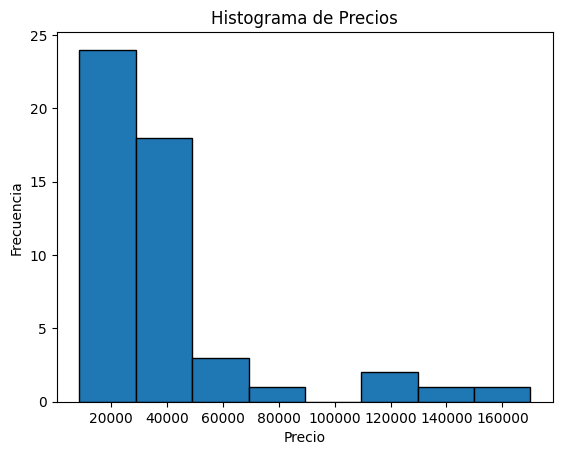

In [18]:
# Resolver acá

!pip install matplotlib
import matplotlib.pyplot as plt # importamos la librería gráfica. plt es el nombre por convención que se le asigna

# Crear un histograma con Matplotlib
plt.hist(precios, bins=8, edgecolor='black')
    
# Configuramos los títulos
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
    
# Mostramos el histograma
plt.show()

#Se vizualizan algunos outliers en el grafico, son las barras pequenias del lado derecho

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [34]:
import requests

# ID de la categoría Electrodomésticos
categoria_id = "MLA1055"  

# URL de la API para obtener productos de la categoría
url_productos_categoria = f"https://api.mercadolibre.com/sites/MLA/search?category={categoria_id}"

# Hacemos la solicitud GET para obtener los productos de la categoría
response_productos_categoria = requests.get(url_productos_categoria)


# Convertimos la respuesta a formato JSON
data_productos_categoria = response_productos_categoria.json()
    
# Extraemos los ítems del JSON
items_categoria = data_productos_categoria.get('results', [])
    
if items_categoria:
    # Mostramos los títulos y precios de los productos en la categoría
    for item in items_categoria:
        titulo = item.get('title')
        precio = item.get('price')
        print(f"Título: {titulo}, Precio: {precio}")
else:
    print("No se encontraron productos en esta categoría.")

Título: Celular Alcatel 1 Ultra32 32/1gb Black, Precio: 69999
Título: Samsung Galaxy A15 128 Gb Negro Azulado 4 Gb Ram, Precio: 329999
Título: Tcl 40 Se 256 Gb  Dark Gray 6 Gb Ram, Precio: 279999
Título: Samsung Galaxy A55 256gb Awesome Navy 8gb Ram, Precio: 999999
Título: Moto G24 Power 128gb + 8gb Glacier Blue, Precio: 429999
Título: Tcl 408 64gb Gravity Gray 6gb Ram, Precio: 189999
Título: Motorola Moto E22 64gb Azul 4gb Ram, Precio: 264999
Título: Zte Blade A33 Plus 32 Gb  Space Gray 2 Gb Ram, Precio: 139999
Título: Alcatel 1 Ultra 32 Gb  Negro 1 Gb Ram, Precio: 63399
Título: Motorola Moto G23 128 Gb  Azul Cielo 4 Gb Ram, Precio: 259798
Título: Tecno Spark 20c Dual Sim 128 Gb Negro 4 Gb Ram, Precio: 249999
Título: Xiaomi Redmi 13c Dual Sim 128 Gb  Navy Blue 4 Gb Ram, Precio: 265151
Título: Teléfono Celular Zte Blade A73 128gb 4gb Ram Space Black , Precio: 237999
Título:  Moto G32 128 Gb  Rosa Metálico 6 Gb Ram, Precio: 349999
Título: Motorola Moto G85 5g 256gb + 8gb Ram Urban Grey,

In [37]:

if items_categoria:
     # Inicializamos precios y productos
    precio_maximo = float('-inf') #valores extremos para asegurar que cualquier precio de producto se actualice correctamente
    precio_minimo = float('inf')
    producto_mas_caro = "" 
    producto_mas_barato = ""

    for item in items_categoria:
        titulo = item.get('title')
        precio = item.get('price')
            
        # Actualizamos el producto más caro y barato sobre el precio de cada uno
        if precio > precio_maximo:
            precio_maximo = precio
            producto_mas_caro = f"Título: {titulo}, Precio: {precio}"
                
        if precio < precio_minimo:
            precio_minimo = precio
            producto_mas_barato = f"Título: {titulo}, Precio: {precio}"
            
    # Imprimimos los resultados
    if producto_mas_caro and producto_mas_barato:
        print(f"Producto más caro: {producto_mas_caro}")
        print(f"Producto más barato: {producto_mas_barato}")
else:
    print("No se encontraron productos en esta categoría.")


Producto más caro: Título: Samsung Galaxy S24 Ultra 256 Gb Titanium Gray 12 Gb Ram, Precio: 2599999
Producto más barato: Título: Kanji Fon Dual Sim 32 Mb  Azul 32 Mb Ram, Precio: 26999


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [154]:
# Resolver acá
!pip install requests
!pip install BeautifulSoup
!pip install pandas

import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd 

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/pip-install-b55ccg2z/beautifulsoup_5e70be5981994dcea1068c0001907f57/setup.py", line 3
          "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                         ^^
      SyntaxError: invalid syntax
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-gener

In [155]:
#extraer los links de las noticias de la portada del diario La Nación.
#url de la portada de La Nación
url = 'https://www.lanacion.com.ar/'

#esta funcion peermite obtener el contenido de la pagina
response = requests.get(url)
contenido = response.content
contenido

soup = BeautifulSoup(response.content, 'html.parser')
soup

#encontrar todos los enlaces de la pagina
links = soup.find_all('a', href=True)
print(links)

[<a class="link ln-link --weather mr-16" data-event="e_linkclick" data-section="MenuLN" href="/clima/" target="_self" title="Clima"><div class="ln-weather flex ai-center jc-start w-max text-black"><span class="text ln-text place mr-8 text-light-800 --font-xs">Capital Federal</span><i class="icon mr-4 --icon-16"><svg fill="currentColor" height="24" viewbox="0 0 24 24" width="24"><use href="/pf/resources/images/la-nacion-ar-sprite-critical.svg?d=1661#sunCloudy"></use></svg></i><span class="text ln-text --font-bold --font-xs">21.4º</span></div></a>, <a class="link ln-link flex gap-8 uppercase ai-center --font-xs --unstyled" data-event="e_linkclick" href="https://club.lanacion.com.ar/" rel="nofollow" target="_blank" title="CLUB LN"><i class="icon" style="height:20px"><svg fill="#333333" height="24" viewbox="0 0 24 24" width="24"><use href="/pf/resources/images/la-nacion-ar-sprite-critical.svg?d=1661#clubLnDefault"></use></svg></i>CLUB LN</a>, <a class="link ln-link flex gap-8 uppercase ai-

In [158]:
lista_links = [] #creamos una lista vacía para almacenar todos los enlaces a noticias que vayamos extrayendo
for link in links: #bucle que que itera sobre todos los elementos de la lista "links" que obtuvimos previamente
    href = link['href'] #href define la dirección (URL) hacia donde se redirige cuando se hace clic en el link
    if href.startswith('/'): #filtra las rutas internas - estas suelen comenzar con "/"
        # Concatenar el dominio al enlace para obtener la URL completa
        url_completa = 'https://www.lanacion.com.ar' + href #concatenamos el dominio principal del sitio web (la nacion) con la ruta que extraimos de href
        lista_links.append(url_completa) #añadimos el enlace completo a la lista - cada enlace que pase el filtro y sea una ruta interna se guarda en esta lista

lista_links

['https://www.lanacion.com.ar/clima/',
 'https://www.lanacion.com.ar/',
 'https://www.lanacion.com.ar/autos/',
 'https://www.lanacion.com.ar/salud/',
 'https://www.lanacion.com.ar/juegos/',
 'https://www.lanacion.com.ar/suscriptores/',
 'https://www.lanacion.com.ar/mis-notas/',
 'https://www.lanacion.com.ar/el-mundo/el-papelon-de-lula-da-silva-la-burla-de-maduro-y-el-camino-hacia-ningun-lado-nid07092024/',
 'https://www.lanacion.com.ar/el-mundo/edmundo-gonzalez-urrutia-llego-a-espana-que-le-otorgo-asilo-politico-nid08092024/',
 'https://www.lanacion.com.ar/opinion/la-casta-que-rodea-al-presidente-nid08092024/',
 'https://www.lanacion.com.ar/politica/el-pacto-no-escrito-entre-javier-milei-y-cristina-kirchner-nid07092024/',
 'https://www.lanacion.com.ar/politica/internaron-al-jefe-de-gabinete-guillermo-francos-por-un-cuadro-gastrointestinal-agudo-nid08092024/',
 'https://www.lanacion.com.ar/el-mundo/oriente-medio-un-argentino-fue-asesinado-en-un-ataque-terrorista-donde-murieron-otros-dos

In [160]:
#eliminamos enlaces duplicados usando set y luego convertirlo de nuevo a lista
lista_links = list(set(lista_links))

In [162]:
#convertimos la lista de links de noticias en un DataFrame 
df_lista_links = pd.DataFrame(lista_links, columns=['Enlaces de Noticias'])
print(df_lista_links)

                                   Enlaces de Noticias
0    https://www.lanacion.com.ar/economia/campo/com...
1    https://www.lanacion.com.ar/economia/campo/el-...
2        https://www.lanacion.com.ar/juegos/crucimini/
3    https://www.lanacion.com.ar/lifestyle/cuidado-...
4        https://www.lanacion.com.ar/autos/test-drive/
..                                                 ...
133  https://www.lanacion.com.ar/lifestyle/hija-de-...
134        https://www.lanacion.com.ar/turismo/viajes/
135  https://www.lanacion.com.ar/loterias/quini-6-c...
136  https://www.lanacion.com.ar/opinion/la-casta-q...
137  https://www.lanacion.com.ar/politica/la-denunc...

[138 rows x 1 columns]


In [168]:
#exportamos el DataFrame a un archivo Excel
df_lista_links.to_excel('enlaces_noticias_lanacion.xlsx', index=False)
print('Links guardados en el archivo: enlaces_noticias_lanacion.xlsx')

Links guardados en el archivo: enlaces_noticias_lanacion.xlsx
